# Random Forest Methodology

##### Author information
- Name: Rubiga Kim
- email address: 
- GitHub: 

#### Part 1. Brief background of methodology
- Explain the situation before this methodology was introduced.

Before the introduction of the Random Forest methodology, various algorithms were used for classification tasks, such as decision trees and ensemble methods like bagging and boosting. But, these methods had certain limitations. Decision trees tend to overfit the training data, leading to poor generalization on unseen data. Bagging improved the performance by combining multiple decision trees, but it still suffered from overfitting in certain cases. Boosting methods addressed the overfitting issue but were computationally expensive.

- Explain why this methodology is introduced and where it can be used.

Random Forest methodology was introduced as a solution to overcome these limitations. It was proposed by Leo Breiman in 2001. Random Forest combines the concepts of bagging and feature randomness to create an ensemble of decision trees. It aims to reduce overfitting, improve generalization, and provide robust predictions.

Random Forest methodology is introduced to handle classification and regression tasks. It can be used in various domains such as healthcare, finance, marketing, and image recognition. It has gained popularity due to its high predictive accuracy, ability to handle high-dimensional data, and resistance to overfitting.

*Relevance to my toy example (Ref "Early Diagnosis of Breast Cancer Prediction using <u>Random Forest</u> Classifier":  https://iopscience.iop.org/article/10.1088/1757-899X/1116/1/012187)*

1. <u>Random forest</u> is utilized for prediction of breast cancer using a dataset consisting of features and corresponding labels indicating whether the cases are malignant or benign. 
2. <u>Random forest</u> have a built-in capability to measure feature importance to allow identification of most relevant features for prediction
3. Once the <u>Random Forest</u> model is trained and evaluated, it can be used to make predictions on new, unseen data. It would be able ouput the predict class label (malignant or benign) 

![Alt Text](Randomforest_acc.jpg)

#### Part 2. Key concept of methodology
- Explain the key concept of the methodology with mathematical equations.

Let **X** be the input features and **Y** be the target variable.

1. Bagging (Bootstrap Aggregation): Random Forest uses the concept of bagging, which involves creating multiple subsets of the original training data by randomly sampling with replacement. Each subset is used to train a separate decision tree.<br>
Create **B** subsets **D1, D2, ..., DB** of the training data using bootstrap sampling:
**Di = {(xi, yi) | xi, yi ∈ X, Y}** (where **xi** is a feature vector and **yi** is the corresponding target value)

2. Feature Randomness: In each decision tree of the Random Forest, feature randomness is introduced by considering only a random subset of features at each node split. This helps in reducing the correlation between trees and improving the diversity of the ensemble.<br>
For each subset **Di**, grow a decision tree **Ti** using a random subset of features.
At each node, select a random subset of features **Fk** from the full feature set **F**.

3. Ensemble Voting: Random Forest combines the predictions of all decision trees in the ensemble to make the final prediction. In classification tasks, it uses majority voting, where the class with the most votes is selected. In regression tasks, it uses averaging to obtain the final prediction.<br>
For <u>classification tasks</u>, predict the class label by majority voting of all decision trees:<br>
Final prediction = mode(**T1(X), T2(X), ..., TB(X)**)<br>
For <u>regression tasks</u>, predict the target value by averaging the predictions of all decision trees:<br>
Final prediction = mean(**T1(X), T2(X), ..., TB(X)**)<br>

- Explain the main strength of the methodology. 

#### Part 3. Example
- Using a very simple toy data, write down a sample code.
- You must present the result, what it means, and how it can be used.

In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9649122807017544


<u>Result</u><br>
The code trains a Random Forest Classifier on the breast cancer dataset and makes predictions on the test set. The accuracy of the model is printed, which represents the percentage of correct predictions.

<u>Usage and Interpretation</u><br>
The accuracy score obtained indicates how well the Random Forest model predicts the breast cancer as malignant or benign. This information can be used to assess the effectiveness of the model in identifying breast cancer cases. Higher accuracy implies better performance. The trained model can be further utilized to predict the malignancy of new, unseen cases based on their features, aiding in early detection and medical decision-making.

## <u>Implementing methodology on actual data</u>
Source: UCI Machine Learning Respository<br>
https://archive-beta.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

### Summary of implementation
1. The data is explored so that we would know what data we are working with to <u>decide on a methodology<u/>.
2. The quality of the target variables are checked to see the possibility of categorization so that it would give better accuracy for the proposed methodology.
3. The feature variables and their quality is checked ~ possibility of dimension reduction and normalization
4. Checked previous studies related with breast cancer and check whether the accuracy of the proposed methodology is similar to that of previous study. 

## 1. Import required packages

In [267]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

## 2. Load the prepared training data 

In [268]:
#Read the data 
import pandas as pd
df = pd.read_csv('breast-cancer-wisconsin.csv')
df    

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [269]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

## 3. Explore the Data

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [271]:
df = df.replace('?', np.nan)

In [272]:
#As there are missing values, this technique inputs the missing values with appropriate values
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Impute missing values
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0
695,841769.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
696,888820.0,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4.0
697,897471.0,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4.0


In [273]:
x_train = df.drop(['Sample code number'], axis = 1)
x_train

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4.0
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4.0


In [274]:
# Separate feature columns (x_train) and target column (y_train)
x_train = x_train.drop('Class', axis=1) 
y_train = df.Class

# Save x_train and y_train as separate CSV files
#x_train.to_csv('x_train.csv', index=False)
#y_train.to_csv('y_train.csv', index=False)

In [275]:
y_train

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
694    2.0
695    2.0
696    4.0
697    4.0
698    4.0
Name: Class, Length: 699, dtype: float64

In [276]:
# According to the reference file -> 2 for Benign, 4 for Malignant
y_train = y_train.replace({2.0: 'B', 4.0: 'M'})
y_train = y_train.to_frame(name='Class')
y_train

,Class
0,B
1,B
2,B
3,B
4,B
...,...
694,B
695,B
696,M
697,M


B    458
M    241
Name: Class, dtype: int64


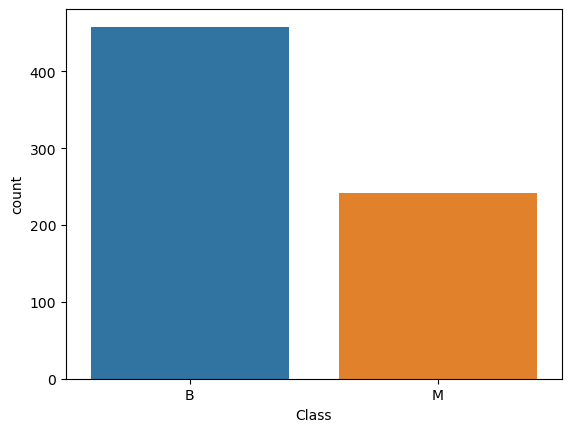

In [277]:
# Count the occurrences of each value in 'y_train' column
value_counts = y_train['Class'].value_counts()

# Plot the count using seaborn
sns.countplot(data=y_train, x='Class')

# Display the count
print(value_counts)

In [278]:
x_train.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## 4. Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Clump Thickness'),
  Text(1, 0, 'Uniformity of Cell Size'),
  Text(2, 0, 'Uniformity of Cell Shape '),
  Text(3, 0, 'Marginal Adhesion'),
  Text(4, 0, 'Single Epithelial Cell Size'),
  Text(5, 0, 'Bare Nuclei'),
  Text(6, 0, 'Bland Chromatin'),
  Text(7, 0, 'Normal Nucleoli')])

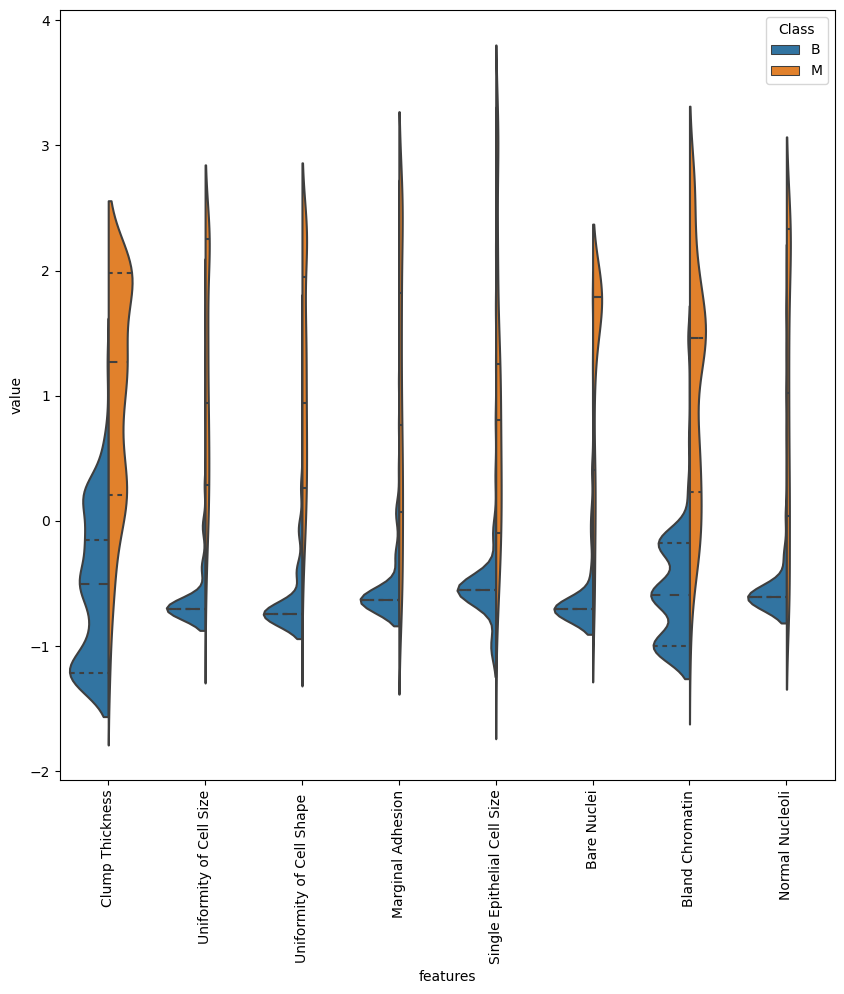

In [279]:
#Before visualization we need to normalize or standardize the data. 
data_dia = y_train
data = x_train
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y_train,data_n_2.iloc[:,0:8]],axis=1)
data = pd.melt(data,id_vars="Class",
                    var_name="features",
                    value_name='value')
data['value'] = pd.to_numeric(data['value'], errors='coerce')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Class", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

* We could observe imbalance of data from above for 'Marginal Adhesion', 'Mitoses', 'Normal Nucleoli', 'Single Epithelial Cell Size', and 'Uniformity of Cell shape' 

* We could observe data imbalance 

In [280]:
#By oversampling the minority class, we could balance the data
from imblearn.over_sampling import SMOTE

# X: feature matrix, y: target variable
# Assuming X contains your feature data and y contains the corresponding class labels

# Instantiate SMOTE
smote = SMOTE()

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)


## 5. Correlation of Variables (EDA) for feature importance selection

- Features with high correlations with other features may contain redunant or duplicated information. 
- By removing such highly correlated features, the code aims to reduce multicollinearity that could negatively affect the proposed methodology's performance and interpretability

<Axes: >

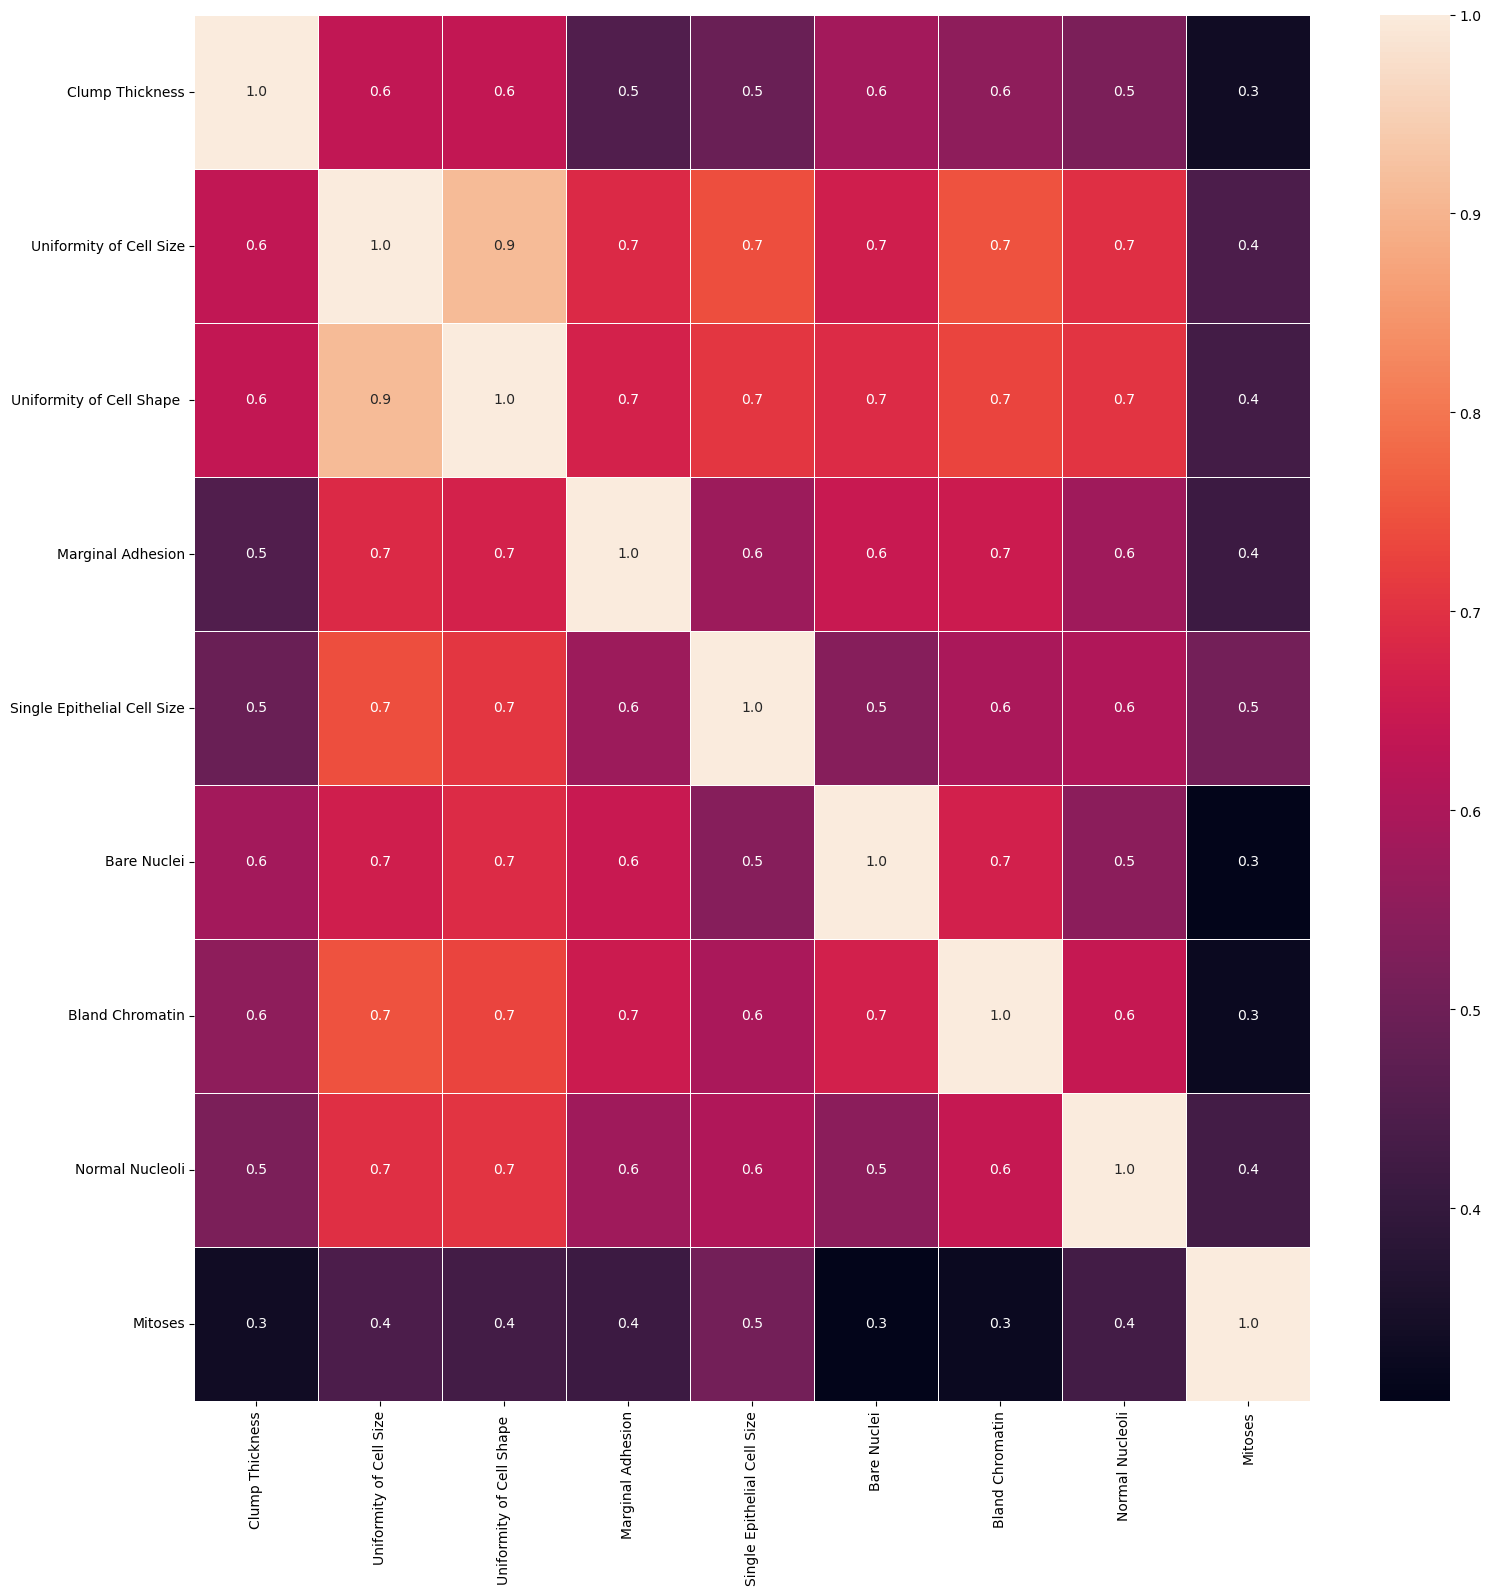

In [281]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X_resampled.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [282]:
# Define threshold
threshold = 0.9  
# Absolute value correlation matrix 
corr_matrix = X_resampled.corr().abs() 
corr_matrix.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Clump Thickness,1.000000,0.633105,0.635802,0.450766,0.491944,0.586047,0.551092,0.522289,0.334832
Uniformity of Cell Size,0.633105,1.000000,0.912075,0.685677,0.743893,0.661998,0.749121,0.696224,0.444553
Uniformity of Cell Shape,0.635802,0.912075,1.000000,0.669711,0.708547,0.688046,0.728622,0.703462,0.427794
Marginal Adhesion,0.450766,0.685677,0.669711,1.000000,0.574332,0.647946,0.652692,0.580115,0.413773
Single Epithelial Cell Size,0.491944,0.743893,0.708547,0.574332,1.000000,0.539372,0.596676,0.608005,0.508242


In [283]:
# Upper triangle of correlations 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) 
upper.head()

/var/folders/bm/jj50yh0n3nz9zqlp793791tc0000gn/T/ipykernel_2186/1583250573.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Clump Thickness,NaN,0.633105,0.635802,0.450766,0.491944,0.586047,0.551092,0.522289,0.334832
Uniformity of Cell Size,NaN,NaN,0.912075,0.685677,0.743893,0.661998,0.749121,0.696224,0.444553
Uniformity of Cell Shape,NaN,NaN,NaN,0.669711,0.708547,0.688046,0.728622,0.703462,0.427794
Marginal Adhesion,NaN,NaN,NaN,NaN,0.574332,0.647946,0.652692,0.580115,0.413773
Single Epithelial Cell Size,NaN,NaN,NaN,NaN,NaN,0.539372,0.596676,0.608005,0.508242


In [284]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 1 columns to remove.


In [285]:
X_resampled.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0


In [286]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
to_drop

['Uniformity of Cell Shape ']

In [287]:
X_resampled = X_resampled.drop(columns = to_drop)

In [288]:
print('Training shape: ', X_resampled.shape)
print('Testing shape: ', y_resampled.shape)

Training shape:  (916, 8)
Testing shape:  (916, 1)


## 6. Methodology selection 

- The following random forest methodology is implemented
- The variables that are used in the methodology will determine it's accuracy, and as there is no simple perfect answer on which variables are to be used, I've used different ways for feature selection and compared the accuracy of the proposed random forest methodology

* Random forest is used to find the accuracy according to the chosen features

Accuracy is:  0.9745454545454545


/var/folders/bm/jj50yh0n3nz9zqlp793791tc0000gn/T/ipykernel_2186/2322080940.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(x_train,y_train)


<Axes: >

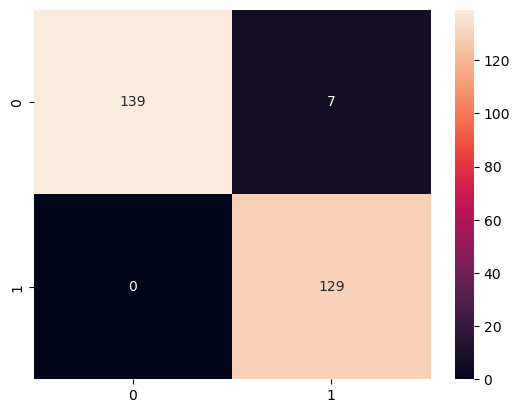

In [289]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

* Accuracy is almost 97%, and from the confusion matrix we can see that there are few wrong predictions

### 6.1 Further feature selection with SelectKBest - Accuracy 97%

In [290]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [291]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [ 571.56177634 1136.73010093  829.33995655  437.95003749 1386.5002295
  585.67426283  915.30114207  206.53369836]
Feature list: Index(['Clump Thickness', 'Uniformity of Cell Size', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')


Accuracy is:  0.9709090909090909


/var/folders/bm/jj50yh0n3nz9zqlp793791tc0000gn/T/ipykernel_2186/2807757326.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)


<Axes: >

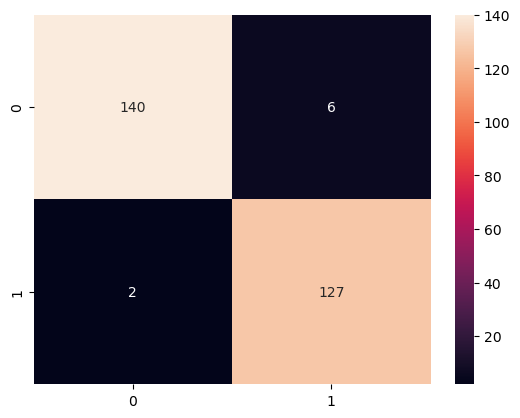

In [292]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

### 6.2 Recursive feature elimination with Random forest - Accuracy 97%

In [293]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

/Users/kruby/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/kruby/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/kruby/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/kruby/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py:326: DataConversionWarning: A

In [294]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['Uniformity of Cell Size', 'Single Epithelial Cell Size', 'Bare Nuclei',
       'Bland Chromatin', 'Normal Nucleoli'],
      dtype='object')


Accuracy is:  0.9672727272727273


/var/folders/bm/jj50yh0n3nz9zqlp793791tc0000gn/T/ipykernel_2186/2807757326.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)


<Axes: >

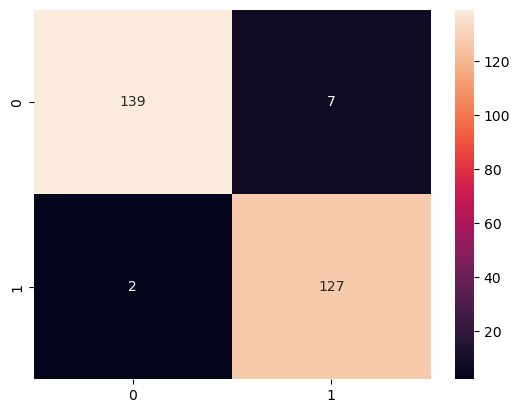

In [295]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

### 6.3 Random Forest Classification and Tree based feature selection - Accuracy 97%

- ref: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 


Feature ranking:
1. feature 1 (0.295782)
2. feature 4 (0.203849)
3. feature 5 (0.139072)
4. feature 3 (0.117501)
5. feature 0 (0.093047)
6. feature 6 (0.073750)
7. feature 2 (0.068263)
8. feature 7 (0.008736)


/var/folders/bm/jj50yh0n3nz9zqlp793791tc0000gn/T/ipykernel_2186/3429463734.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf_5 = clf_rf_5.fit(x_train,y_train)


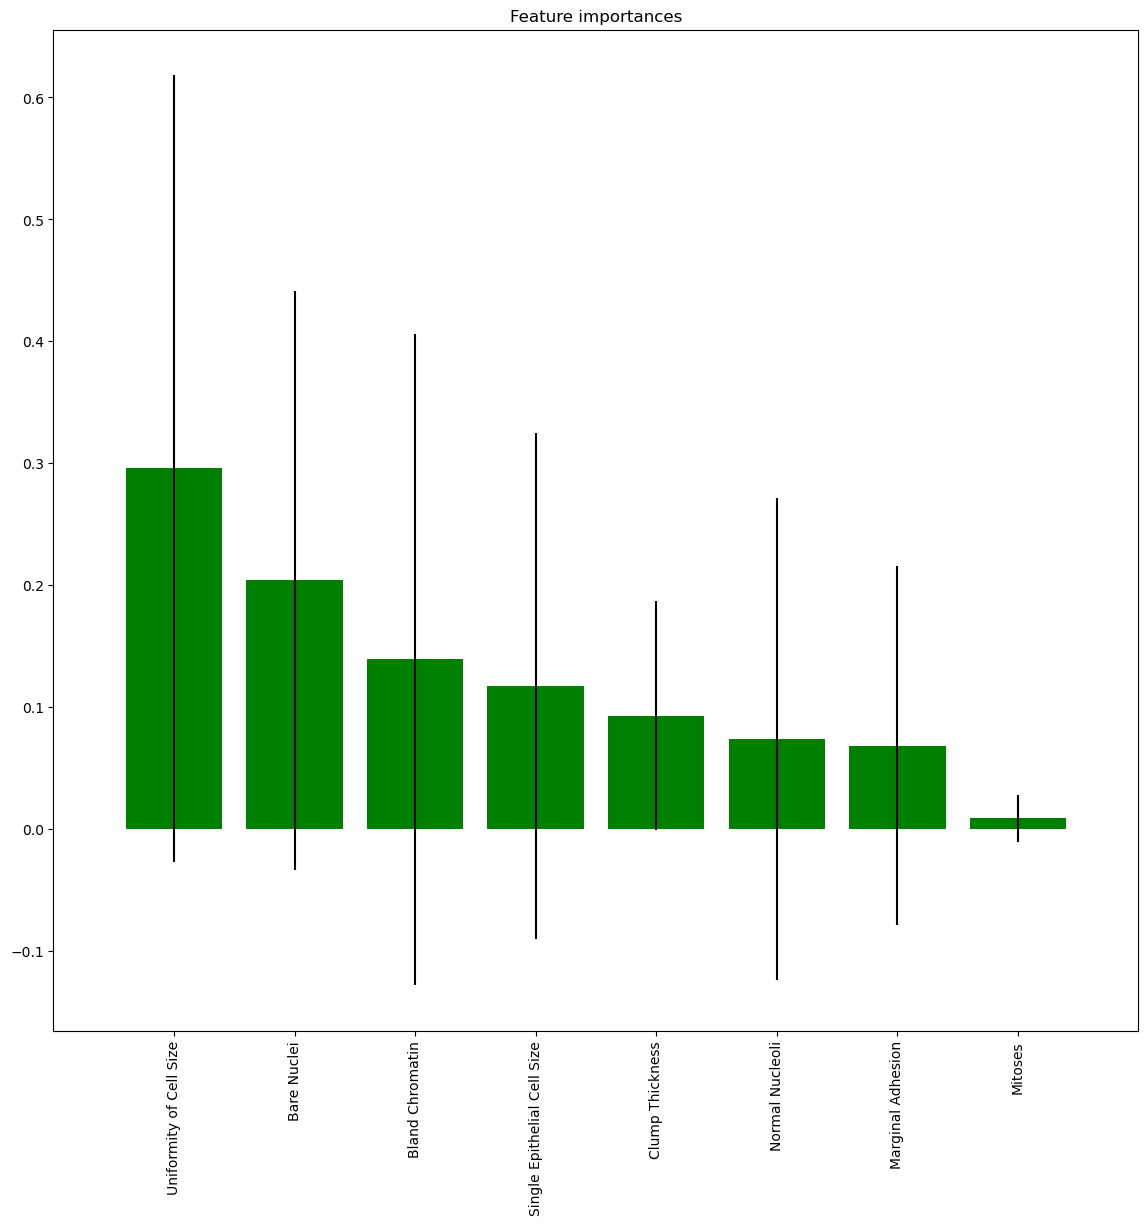

In [297]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [298]:
# Make predictions on the test set
y_pred = clr_rf_5.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score:", accuracy)

Accuracy score: 0.9745454545454545
